In [ ]:
  !python --version

Python 3.8.16


<img src="Data/UP Data Science Society Logo 2.png" width=700>

# [2.4] Other applications of Numpy (Image Processing)
**Prepared by:**

- Michael Adrian Javier
- Dexter To

**Topics to cover:**

- Basics of Image Processing
- Convolution of Images

**Weekly Objectives:**

- To be able to plot images and create basic image manipulations

- To apply various kernels and get an intuition to the parameters

**References:**
- [Python documentation](https://docs.python.org/3/)
- [(Ivezic, Connolly, Vanderplas, Gray) Statistics, Data Mining, and Machine Learning in Astronomy](https://press.princeton.edu/books/hardcover/9780691198309/statistics-data-mining-and-machine-learning-in-astronomy)
- [W3Schools: Python Data Types](https://www.w3schools.com/python/python_datatypes.asp)
- [SIPI Image Database](https://sipi.usc.edu/database/)
- [Kernel (Image processing)](https://en.wikipedia.org/wiki/Kernel_(image_processing))

**Note:** Some of the markdowns have been composed with the help of large language models, such as ChatGPT.

# I. Basic Image Processing

Numpy can read in certain files types, this includes images stored as arrays. We'll quickly cover how you can work with images in NumPy.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### A. Loading Images

There are a lot of ways of loading in images in Python, but in this module we will only focus on loading in images from a website. We are gonna use the `imread` command from the `imageio` package. The command is used as such:

<center>

```imread('url', *kwargs)```

</center>

Plotting [this picture](https://i.imgur.com/xY2xDxo.jpeg) as `img1`, we have

In [ ]:
from imageio.v2 import imread

C:\Users\Dexter\AppData\Local\Temp\ipykernel_18112\2689853755.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img1 = imread("https://i.imgur.com/xY2xDxo.jpeg")


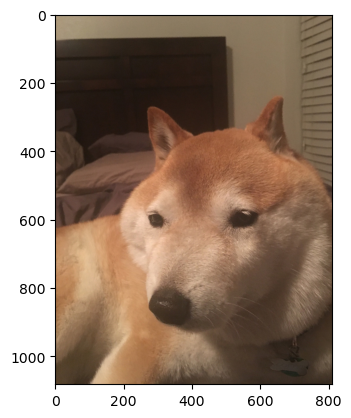

In [ ]:
img1 = imread("https://i.imgur.com/xY2xDxo.jpeg")
plt.imshow(img1)

These images are actually NumPy arrays!  Since these are arrays, everything that we can do on normal arrays can be done to these as well even though they represent images. Say we plot another image `img2`, from [this link](https://i.redd.it/7hpza6m1bov81.jpg).

You can also open images using [`pillow`](https://pypi.org/project/Pillow/)

- Installing Pillow

In [ ]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


- Importing `urllib.request` to save image locally
- Using `Image.open` to open image

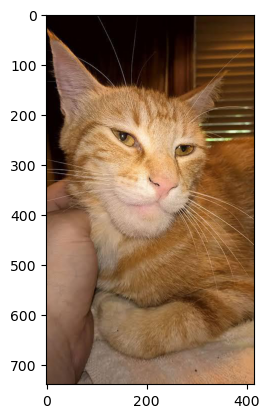

In [ ]:
import urllib.request
from PIL import Image

urllib.request.urlretrieve('https://i.redd.it/7hpza6m1bov81.jpg',"cat.jpg")
img2 = Image.open('cat.jpg')
plt.imshow(img2)

## B. Array Operations for Images

### 1. Arithmetic Operations

We can add, subtract, and do other array operations to them and see what happens!

Note that the size of both arrays should be equal.

To do this, you can resize the image using [`np.delete()`](https://numpy.org/doc/stable/reference/generated/numpy.delete.html) or `Pillow`'s [`resize()`](https://pillow.readthedocs.io/en/latest/_modules/PIL/Image.html#Image.resize)

In our example, the dimensions of `img1` is $(1082,811,3)$ while `img2` is $(739,415,3)$, we want to turn both to the size $(1000,800,3)$

- For `img1`, we'll try using `np.delete()`
- You need to use [`np.s_`](https://numpy.org/doc/stable/reference/generated/numpy.s_.html) to indicate the section you want to trim in conjuction to `np.delete()`
- `np.resize()` will shift the image which will mess up the output

In [ ]:
img1.shape

(1082, 811, 3)

In [ ]:
newimg1=np.delete(img1,np.s_[1000:1082],axis=0)
newimg1=np.delete(newimg1,np.s_[800:811],axis=1)
newimg1.shape

(1000, 800, 3)

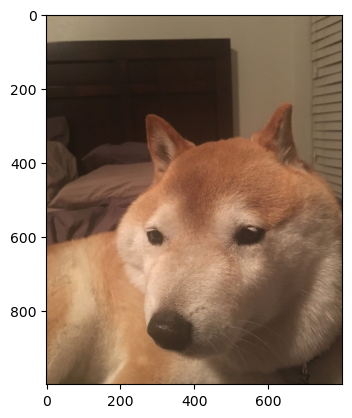

In [ ]:
plt.imshow(newimg1)

For `img2` we'll use `Pillow`'s `resize`

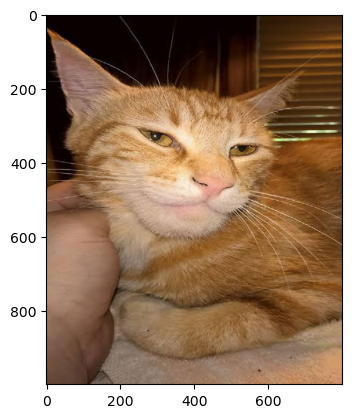

In [ ]:
newimg2=img2.resize((800,1000),Image.NEAREST)

plt.imshow(newimg2)

**Note that for the operations below to work, both images have to be of array.**

Due to the nature of the second image processed using `Pillow`, attempting to access its elements as if it were a NumPy array is not directly permissible.


This is because Pillow's Image object does not support direct array-like access.

**To work with the image data in a NumPy array format, it is necessary to convert the Image object to a NumPy array first**, perform the desired operations, and then convert it back to the Image object when needed.

- converting `newimg2` to NumPy array

In [ ]:
newimg2arr=np.array(newimg2)


We can add, subtract, and do other array operations to them and see what happens!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


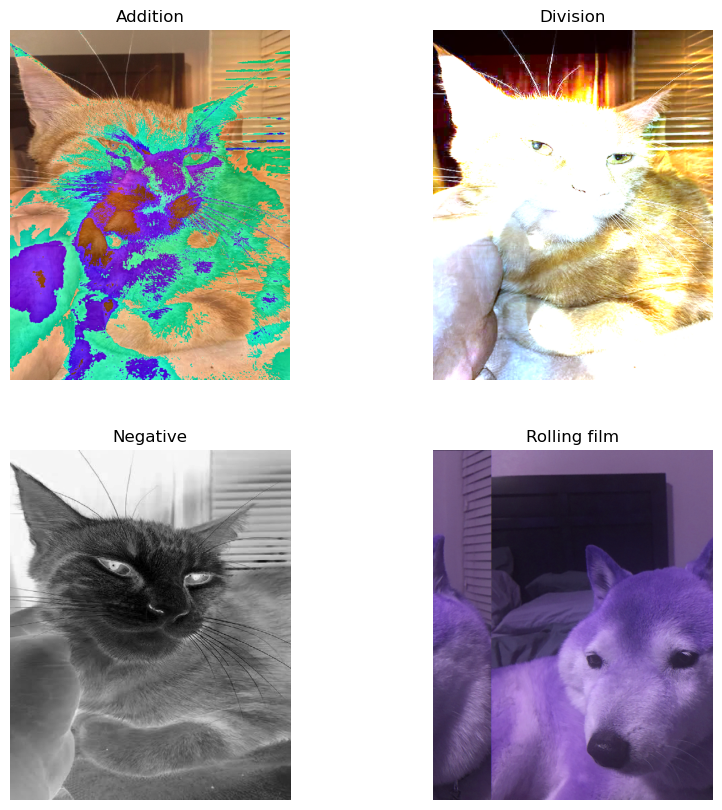

In [ ]:
operations = [newimg1 + newimg2arr, newimg2arr/newimg1, 255 - newimg2arr[:, :, 0], np.roll(newimg1, 500)]
titles = ['Addition', 'Division', 'Negative', 'Rolling film']
plt.figure(figsize=(10, 10))
for i in range(4):
  plt.subplot(2, 2, i+1)
  if i == 2:
    plt.imshow(operations[i], cmap = 'gray')
  else:
    plt.imshow(operations[i])
  plt.title(titles[i])
  plt.axis('off') # Disables the axis of each plot to see each image better
plt.show()

Note that there's a "Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers)." error above, this can be avoided by using [`np.clip()`](https://numpy.org/doc/stable/reference/generated/numpy.clip.html) function to ensure that the pixel values are within the valid range before displaying the images.

Let's try it with other images namely [`img3`](https://sipi.usc.edu/database/preview/misc/4.1.04.png) and [`img4`](https://sipi.usc.edu/database/preview/misc/4.1.06.png)

C:\Users\Dexter\AppData\Local\Temp\ipykernel_18112\2033487439.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img3 = imread("https://sipi.usc.edu/database/preview/misc/4.1.04.png")


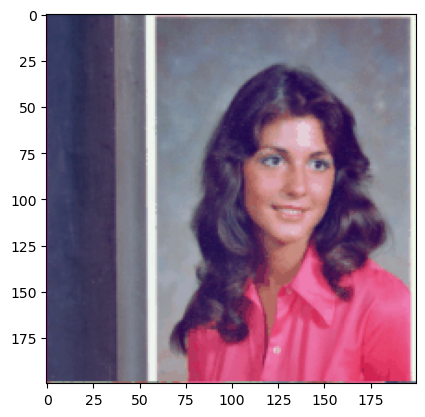

In [ ]:
img3 = imread("https://sipi.usc.edu/database/preview/misc/4.1.04.png")
plt.imshow(img3)

C:\Users\Dexter\AppData\Local\Temp\ipykernel_18112\1976818581.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img4 = imread('https://sipi.usc.edu/database/preview/misc/4.1.06.png')


(200, 200, 4)

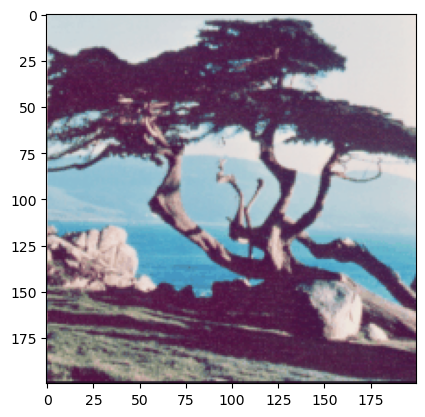

In [ ]:
img4 = imread('https://sipi.usc.edu/database/preview/misc/4.1.06.png')
plt.imshow(img4)
img4.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


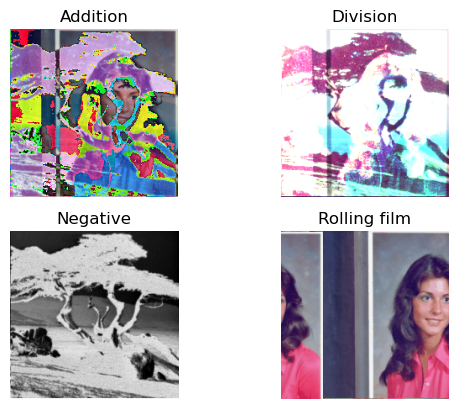

In [ ]:
operations = [img3 + img4, img4/img3, 255 - img4[:, :, 0], np.roll(img3, 200)]
titles = ['Addition', 'Division', 'Negative', 'Rolling film']

for i in range(4):

  plt.subplot(2, 2, i+1)

  if i == 2:
    plt.imshow(operations[i], cmap = 'gray')
  else:

    plt.imshow(operations[i])

  plt.title(titles[i])
  plt.axis('off') # Disables the axis of each plot to see each image better

plt.show()

The first two images show that images can be applied with standard matrix operations. The third image shows that we can take the negative of an image by subtracting it from 255 (essentially subtracting the image from white). The fourth image rolls the image on the x-axis, where the image resembles like a rolling film.

### 2. Flipping Images

For this excercise we'll use this image namely [`img5`](https://i.imgur.com/s13KDjJ.jpeg)

In [ ]:
img5 = imread("https://i.imgur.com/s13KDjJ.jpeg")

C:\Users\Dexter\AppData\Local\Temp\ipykernel_18112\2247940663.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img5 = imread("https://i.imgur.com/s13KDjJ.jpeg")


We can also flip images like using the command `np.flip(array, direction)`.

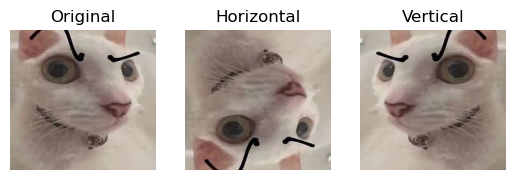

In [ ]:
directions = [-1, 0, 1]
titles = ['Original', 'Horizontal', 'Vertical']

for i in range(3):
  plt.subplot(1, 3, i+1)
  if i == 0:
    plt.imshow(img5)
    plt.axis('off')
  else:
    plt.imshow(np.flip(img5, directions[i]))
    plt.axis('off')
  plt.title(titles[i])
plt.show()

### 3. Indexing to Get Color Channels

We can also retrieve each RGB channel in an image. The way an image is encoded in an array is just an array with 2d arrays corresponding to each color channel of the image.

For a 4 alpha channel, the setup is stored like this:
$$ \text{image} = \begin{bmatrix}
\underbrace{\begin{pmatrix}
 &  &\\
 & &
\end{pmatrix}}_\text{red} & \underbrace{\begin{pmatrix}
 & &\\
 & &
\end{pmatrix}}_\text{green} & \underbrace{\begin{pmatrix}
 & &\\
 & &
\end{pmatrix}}_\text{blue} & \underbrace{\begin{pmatrix}
 & &\\
 & &
\end{pmatrix}}_\text{black}
\end{bmatrix} $$

For a 3 alpha channel, the image is stored like this:
$$ \text{image} = \begin{bmatrix}
\underbrace{\begin{pmatrix}
 &  &\\
 & &
\end{pmatrix}}_\text{red} & \underbrace{\begin{pmatrix}
 & &\\
 & &
\end{pmatrix}}_\text{green} & \underbrace{\begin{pmatrix}
 & &\\
 & &
\end{pmatrix}}_\text{blue}
\end{bmatrix} $$

The example below only shows 3 channels

In [ ]:
img6 = imread("https://i.imgur.com/g5ZeBAZ.jpeg")

C:\Users\Dexter\AppData\Local\Temp\ipykernel_18112\1077317630.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img6 = imread("https://i.imgur.com/g5ZeBAZ.jpeg")


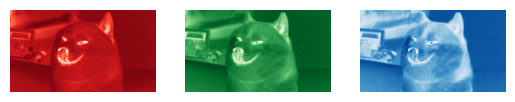

In [ ]:
# Each channel
red = img6[:, :, 0]
green = img6[:, :, 1]
blue = img6[:, :, 2]

channel = [red, green, blue]

# Plotting
cmaps = ['Reds', 'Greens', 'Blues']
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.imshow(channel[i], cmap = cmaps[i])
  plt.axis('off')
plt.show()

### 4. Concatenation

We can even reconstruct the image if we are just given the image in different color channels! This is done by using the function `np.dstack` which essentially concatenates each channel together in an array.

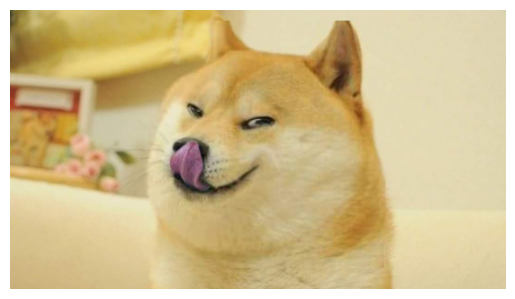

In [ ]:
img6_reconstructed = np.dstack((red, green, blue))

plt.imshow(img6_reconstructed)
plt.axis('off')
plt.show()

# II. Beyond Numpy: Convolution

Convolution is a tool to combine one object $f$ (lists, functions, signals, images) to another object $g$ to create another object. Its common notation is

$$ \text{convolution of f and g} = f * g $$

where

$$ f * g = \int_{-\infty}^{\infty} f(t')g(t - t')\ dt' $$

However in image processing, convolution can be visualized as sliding one image (kernel) to another image and computing the weighted sum over the two. It can be thought of as a "moving average" or "moving sum" of sorts. This may result in the smoothing, sharpening, or any transformation of the original image. The kernel is what dictates the transfromation that the image undergoes.

There is a problem though, as there is an [`np.convolve`](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html) function in NumPy but it can only convolve 1d lists. We then borrow a function from SciPy in the [`scipy.signal`](https://docs.scipy.org/doc/scipy/reference/signal.html) package called `convolve2d`. However, the function [`convolve2d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html#scipy.signal.convolve2d) only works on 2d arrays. Since an image is a 3d array, we have to convolve each component of an image and analyze it separately. We can also reconstruct the image from each of the image channels.

In [ ]:
from scipy.signal import convolve2d

## A. Convolution via Kernels

Let's try to convolve this kernel below!

$$ \frac{1}{4} \begin{pmatrix} 1 & 1 \\
1 & 1 \end{pmatrix} $$

Note that the sum of all the elements in our kernel is 1.  

C:\Users\Dexter\AppData\Local\Temp\ipykernel_18112\4210790888.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img7 = imread("https://i.kym-cdn.com/photos/images/original/002/328/717/f33.jpg")


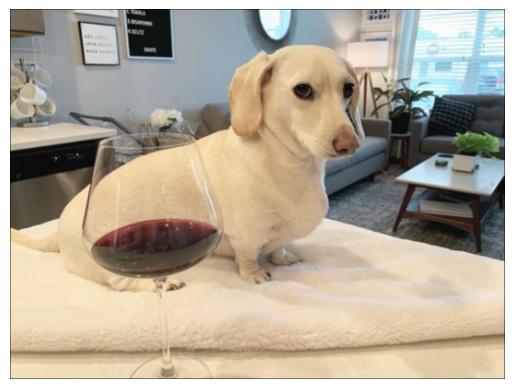

In [ ]:
kernel = 1/4*np.array([[1, 1], [1, 1]])
img7 = imread("https://i.kym-cdn.com/photos/images/original/002/328/717/f33.jpg")
# Retrieval of each color channel
ker_red = convolve2d(img7[:, :, 0], kernel)
ker_green = convolve2d(img7[:, :, 1], kernel)
ker_blue = convolve2d(img7[:, :, 2], kernel)

# Reconstruction of the image
ker_img = np.dstack((ker_red, ker_green, ker_blue))
plt.imshow(ker_img.astype('uint8'))  # .astype('uint8') is to avoid errors
plt.axis('off')
plt.show()

What we essentially did to the image is made it blurrier! Since a convolution can be thought as a moving sum, and we have a factor of $1/4$ on the kernel, the kernel became a moving average.

## B. Gaussian Kernel

We can still polish our kernel though, as the most important part of an image is its center, we can place focus on the center by making it have a higher value than its edges given by this matrix:

$$ \begin{pmatrix}
\frac{1}{16} & \frac{1}{8} & \frac{1}{16} \\
\frac{1}{8} & \frac{1}{4} & \frac{1}{8} \\
\frac{1}{16} & \frac{1}{8} & \frac{1}{16}
\end{pmatrix} $$

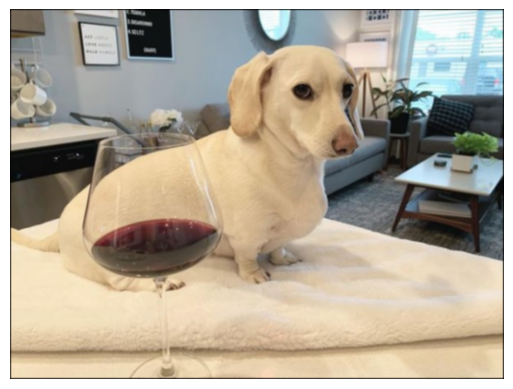

In [ ]:
# Kernel
ker_gauss = np.array([[1/16, 1/8, 1/16], [1/8, 1/4, 1/8], [1/16, 1/8, 1/16]])

# Automation of the retrieval of each channel and convolution
tuple_gauss = []
for i in range(3):
  channel = convolve2d(img7[:, :, i], ker_gauss)
  tuple_gauss.append(channel) # We convert the tuple_gauss list into a tuple since np.dstack requires a tuple of arrays

# Plotting
img1_gauss = np.dstack(tuple(tuple_gauss))
plt.axis('off')
plt.imshow(img1_gauss.astype('uint8')) # .astype('uint8') is to avoid errors
plt.show()

Let's try to compare the output of both kernels.

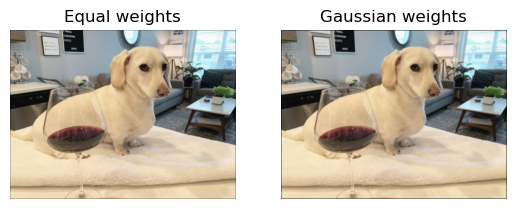

In [ ]:
imgs = [ker_img.astype('uint8'), img1_gauss.astype('uint8')]
titles1 = ['Equal weights', 'Gaussian weights']
for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(imgs[i])
  plt.title(titles1[i])
  plt.axis('off')
plt.show()

We see that we achieved a blurrier output using Gaussian weights! What we did is basically what a Gaussian blur does!

## C. Edge Detection Kernels

Let's try more kernels! Let's use these kernels below:

$$ \text{vertical edge detection} = \begin{pmatrix}
0.25 & 0 & -0.25 \\
0.5 & 0 & -0.5 \\
0.25 & 0 & -0.25 \end{pmatrix} $$

$$ \text{horizontal edge detection} = \text{vertical edge detection}^T $$

Since the image is mostly red, we just focus on the red color channel for this example.

C:\Users\Dexter\AppData\Local\Temp\ipykernel_18112\1388354895.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img8 = imread("https://i.kym-cdn.com/photos/images/original/002/442/832/849.jpg")


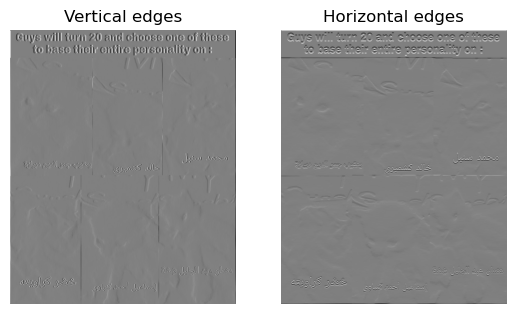

In [ ]:
# Kernels
ker_vert = np.array([[0.25, 0,-0.25], [0.5, 0, -0.5], [0.25, 0, -0.25]])
ker_horz = np.array([[0.25, 0.5, 0.25], [0, 0, 0], [-0.25, -0.5, -0.25]])

img8 = imread("https://i.kym-cdn.com/photos/images/original/002/442/832/849.jpg")
img8_vert = convolve2d(img8[:, :, 0], ker_vert)
img8_horz = convolve2d(img8[:, :, 0], ker_horz)
imgs8 = [img8_vert, img8_horz]
title_det = ['Vertical edges', 'Horizontal edges']

for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(imgs8[i], cmap = 'gray')
  plt.title(title_det[i])
  plt.axis('off')
plt.show()

And if we add the array of the vertical and horizontal edges together, we see the image more clearly!

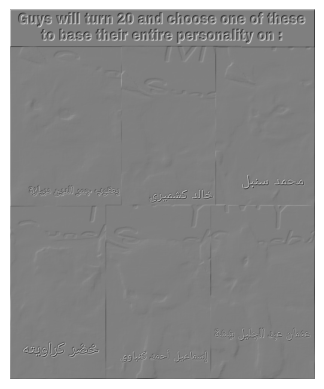

In [ ]:
plt.imshow(img8_vert + img8_horz, cmap='gray')
plt.axis('off')
plt.show()

### D. Fourier transform

Fourier transform represents any object (function, signal, image) as a summation of cosines, sines, or complex exponentials. In this module, fourier transforms can do various transformations to an image: compression, enhancement, and etc.

Now you might think, can't that be done with convolutions as well? It's because both can be thought of as a linear map!

<p align = 'center'>
<img src="https://i.imgur.com/ML1Vl1X.png" width=700>
</p>

An image $f$ can be convolved with a blurring kernel to get a blurred image $F$. However, the following can also be achieved by taking a Fourier transform of an image and passing it to a lowpass filter. We then take its inverse Fourier transform and we will also achieve a blurred image! Let's try doing this to `img1`.

The stars of this module are the commands are:

- [`np.fft.fft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html) - takes the Fourier transform of a 2d NumPy array which returns a complex-valued array

- [`np.fft.ifft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html) - takes the inverse Fourier transform of a 2d NumPy array

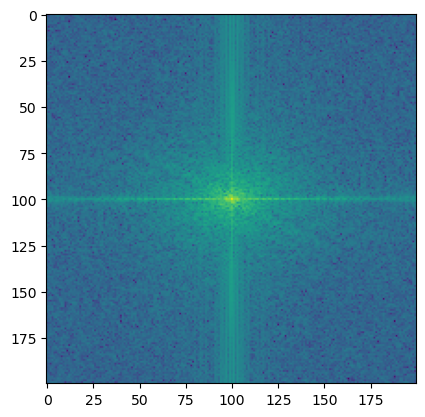

In [ ]:
fft_img = np.fft.fftshift(np.fft.fft2(img3[:, :, 0])) # taking the inverse Fourier transform
plt.imshow(np.log(np.abs(fft_img))) # np.abs as the array is complex-valued, np.log to see the Fourier transformed image f' clearly
plt.show()

One thing not discussed earlier is the [`np.fft.fftshift`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html) function. This function is not essential but it helps in visualizing $F$.

Now, we pass it to a lowpass filter which means getting rid of all the high frequencies. This essentially says that we mask a circle of a certain radius to our Fourier transformed image $F$. The larger the radius, the lower the threshold of our lowpass filter is.

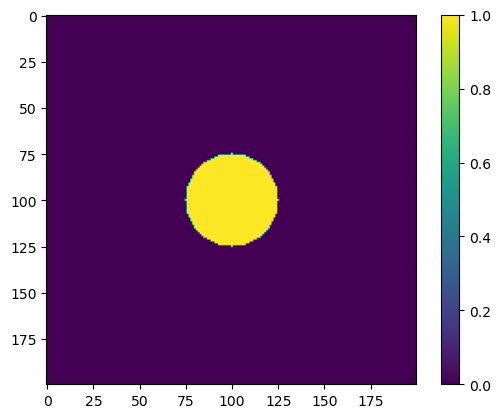

In [ ]:
# Initializing our circle mask

grid = np.arange(0, 200, 1)
X, Y = np.meshgrid(grid, grid)
circle = np.sqrt((X - 100)**2 + (Y - 100)**2) # shape of the mask itself
radius = 25
mask = circle <= radius # we only want infromation inside the radius of the circle

# Plotting the mask
plt.imshow(mask)
plt.colorbar()

And we see that we got the correct mask! We then multiply this to $F$ to get the masked image and get this:

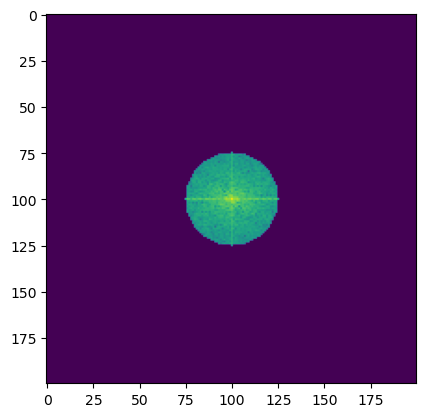

In [ ]:
plt.imshow(np.log(np.abs(fft_img))*mask)

Lastly, we take the inverse Fourier transform of the image below and getting its absolute magnitude again, leaving us with the blurred image!

(-0.5, 199.5, 199.5, -0.5)

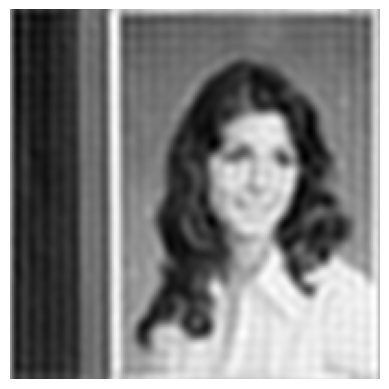

In [ ]:
masked = fft_img*mask  # masked Fourier transformed image F
ifft_img = np.fft.ifft2(masked) # taking the inverse Fourier
plt.imshow(np.abs(ifft_img), cmap = 'gray')
plt.axis('off')

Remember earlier when I said that [`np.fft.fftshift`](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html) is not essential? It's because we can skip that step entirely! However, we do have to take a different approach to our masking. You see, what happens when we don't take `fftshift` our image is that we get our low frequencies (on the corners of our image).

(-0.5, 199.5, 199.5, -0.5)

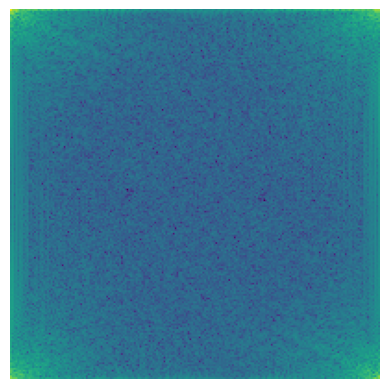

In [ ]:
plt.imshow(np.abs(np.log(np.fft.fft2(img3[:, :, 0]))))
plt.axis('off')

Since the low frequencies are on the corners, passing a lowpass filter on this circumstance means that we take the outside of the circle.

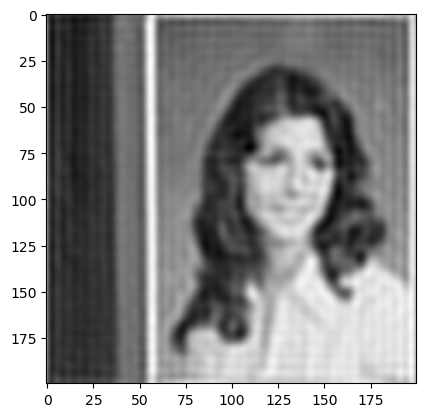

In [ ]:
# Fourier transform and masking
fft_img3 = np.fft.fft2(img3[:, :, 0])
radius1 = 120 # Big radius
mask1 = circle >= radius1 # Notice that >= is the symbol since we want to take the outside of the circle
in_circ = fft_img[mask1] == 0

# Taking the inverse Fourier transform and plotting
ifft_img3 = np.fft.ifft2(fft_img3*mask1)
plt.imshow(np.abs(ifft_img3), cmap = 'gray')

Comparing the two, we see that the results are not that far off! Notice earlier though that the radius of the mask for the fftshifted image is much smaller than the needed radius for the image with no `fftshift` to get the same effect on the image.

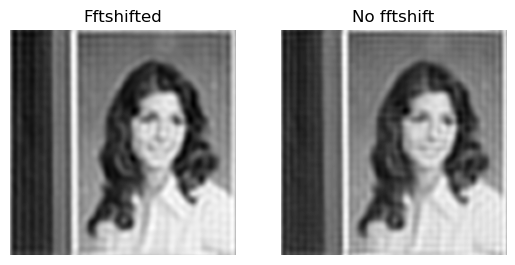

In [ ]:
ffts = [np.abs(ifft_img), np.abs(ifft_img3)]
titles = ['Fftshifted', 'No fftshift']

for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(ffts[i], cmap='gray')
  plt.axis('off')
  plt.title(titles[i])

plt.show()

There are many applications to Fourier transform (it's not just a "longcut" version of convolution) such as pattern recognition, diffraction simulation, etc. However, that is not the scope of this module. The two mentioned applications can be found [here](https://www.mathworks.com/help/images/fourier-transform.html).

### End of tutorial.

---

# Sample exercises

Try to solve exercises these exercises if you like.

## Exercise 1

Load in the image in [this link](https://sipi.usc.edu/database/preview/aerials/2.1.01.png). This is an aerial view of a place in San Diego.

- Apply the vertical edge and horizontal edge detector to see the roads and the highways of the map. Test each channel to see which channel makes the roads most visible.

- Apply the kernel below to the image's black color channel. This is also a sharpening kernel. See what value of $k$ makes the roads visible. Make a subplot for each value of $k \in [1, 9]$.

  $$ \begin{pmatrix} -1 & -1 & -1 \\
  -1 & k & -1 \\
  -1 & -1 & -1
  \end{pmatrix} $$

## Exercise 2

Load in the aerial image of San Francisco [here]('https://sipi.usc.edu/database/preview/aerials/2.1.01.png').

- Use the sharpening filter and use $k = 8$.

- Add the vertical and horizontal edges detector together on all image channels.

## Exercise 3

A highpass filter is done by taking the outside of the circle (on an fftshifted Fourier transform image). Apply a highpass filter of radius 25 on the aerial view of San Diego and San Francisco and observe what kernel can this be compared to when doing convolutions.